In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [5]:
mnist=tf.keras.datasets.fashion_mnist

In [7]:
(training_image,traing_labels),(test_images,test_labels)=mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)
9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

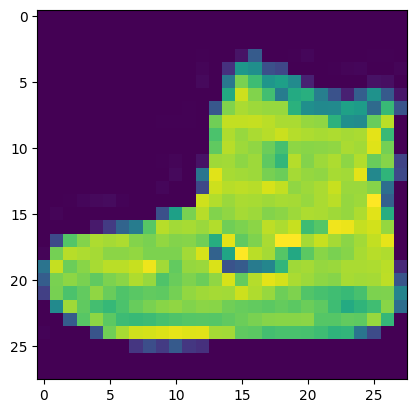

In [17]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_image[0])
print(training_image.shape)
print(traing_labels[0])
print(training_image[0])

# **Normalizer**


In [20]:
training_image=training_image/255
test_images=test_images/255

In [22]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

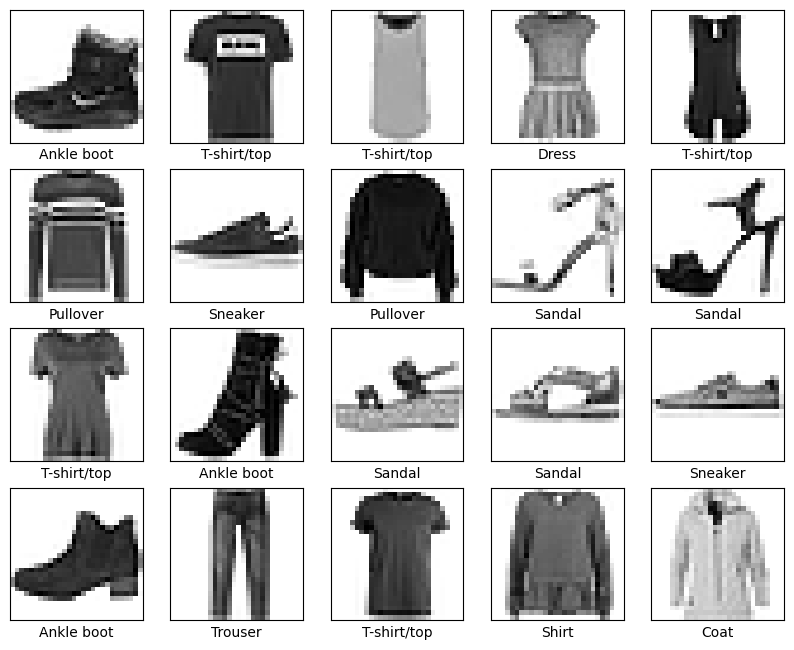

In [23]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_image[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[traing_labels[i]])
plt.show()

# **Neural network & training Data**

In [39]:
from tensorflow.python.ops.gen_nn_ops import softmax
from keras.src.layers.serialization import activation
model= tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(150,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
                                    ])

In [40]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(training_image,traing_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4952 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3712 - accuracy: 0.8674
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3324 - accuracy: 0.8784
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3096 - accuracy: 0.8864
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2933 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2776 - accuracy: 0.8977
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2654 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2544 - accuracy: 0.9059
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2447 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.235

In [41]:
model.evaluate(test_images,test_labels,verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.3444 - accuracy: 0.8754


[0.34444460272789, 0.8754000067710876]

# **Callback**

In [46]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,log={}):
    if (logs.get('accuracy')>=0.91):
     print("\nReached accuracy cancel training")
    self.model.stop_training= True

In [47]:
callback=myCallback()
mnist=tf.keras.datasets.fashion_mnist
(training_image,traing_labels),(test_images,test_labels)=mnist.load_data()
training_image=training_image/255
test_images=test_images/255
model= tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(150,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
                                    ])
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(training_image,traing_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4954 - accuracy: 0.8264
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3714 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3347 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3083 - accuracy: 0.8872
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2890 - accuracy: 0.8947
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2764 - accuracy: 0.8969
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2631 - accuracy: 0.9022
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2529 - accuracy: 0.9054
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2436 - accuracy: 0.9094
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.234